# Juypter in pandas

### Uvažanje knjižnic
Najprej moramo uvoziti knjižnico pandas. Ker bomo v zvezku tudi risali, uvozimo še Matplotlib.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

### Branje podatkov
Za branje celotne datoteke v `dataframe` oziroma tabelo lahko uporabimo funkcijo `read_csv`

In [4]:
df = pd.read_csv('place.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 6: invalid continuation byte

Nastaviti moramo pravilno kodiranje. Z `utf8` očitno ne gre. Kaj pa `cp1250`?

In [5]:
df = pd.read_csv('place.csv', encoding="cp1250")

Tole je šlo čez brez napake. Poglejmo si kako tabela izgleda. Prvih 5 vrstic lahko dobimo z metodo `head`:

In [6]:
df.head()

,"Povprečne mesečne bruto in neto plače pri pravnih osebah javnega in zasebnega sektorja, Slovenija, mesečno"
0,"MESEC\t""SEKTOR""\t""Bruto plača Plača za mesec[E..."
1,"2014M01\t""Javni sektor""\t1758.50\t1151.30"
2,"2014M01\t""Zasebni sektor""\t1421.34\t932.14"
3,"2014M02\t""Javni sektor""\t1745.63\t1136.41"
4,"2014M02\t""Zasebni sektor""\t1406.47\t922.19"


Ne izgleda ravno kot tabela. Prvi dve vrstici bomo raje izpustili, glavo tabele, ki je v vrstici 3, pa bi vseeno obdržali. Število vrstic, ki jih želimo izpustiti lahko podamo preko opcijskega argumenta `skiprows`:

In [8]:
df = pd.read_csv('place.csv', encoding='cp1250', skiprows=2)
df.head()

,"MESEC ""SEKTOR"" ""Bruto plača Plača za mesec[EUR]"" ""Neto plača Plača za mesec[EUR]"""
0,"2014M01\t""Javni sektor""\t1758.50\t1151.30"
1,"2014M01\t""Zasebni sektor""\t1421.34\t932.14"
2,"2014M02\t""Javni sektor""\t1745.63\t1136.41"
3,"2014M02\t""Zasebni sektor""\t1406.47\t922.19"
4,"2014M03\t""Javni sektor""\t1741.44\t1133.47"


Vrstice moramo razbiti na stolpce preko tabulatorja (`\t`). Očitno funkcija datoteko razbija po napačnem ločilu. Ločilo lahko podamo preko opcijskega argumenta `sep`:

In [9]:
df = pd.read_csv('place.csv', encoding='cp1250', skiprows=2, sep="\t")
df.head()

,MESEC,SEKTOR,Bruto plača Plača za mesec[EUR],Neto plača Plača za mesec[EUR]
0,2014M01,Javni sektor,1758.50,1151.30
1,2014M01,Zasebni sektor,1421.34,932.14
2,2014M02,Javni sektor,1745.63,1136.41
3,2014M02,Zasebni sektor,1406.47,922.19
4,2014M03,Javni sektor,1741.44,1133.47


Končno... Več o sami strukturi tabele lahko pogledamo z metodami, kot so `columns` in `shape`:

In [10]:
print(df.columns)
print(df.shape)

Index(['MESEC', 'SEKTOR', 'Bruto plača Plača za mesec[EUR]',
       'Neto plača Plača za mesec[EUR]'],
      dtype='object')
(148, 4)


Vidimo, da ima tabela 148 vrstic in 4 stolpce. Stolpcem lahko damo tudi krajša imena:

In [11]:
df.columns = ['mesec', 'sektor', 'bruto', 'neto']

Pogledamo lahko tudi osnovno statistiko vsebine tabele preko metode `describe`

In [12]:
df.describe()

,bruto,neto
count,148.000000,148.000000
mean,1694.473919,1099.702230
std,217.336086,133.755268
min,1393.050000,915.740000
25%,1471.885000,963.452500
50%,1743.535000,1136.695000
75%,1865.522500,1203.942500
max,2174.570000,1408.770000


### Indeksiranje tabele
Indeksiranje lahko izvedemo podobno, kot pri ostalih podatkovnih tipih jezika Python, le da tokrat v osnovi indeksiramo po stolpcih. Do stolpca `bruto` bi npr. prišli takole:

In [13]:
df['bruto']

0      1758.50
1      1421.34
2      1745.63
3      1406.47
4      1741.44
5      1418.26
6      1771.34
7      1410.87
8      1777.09
9      1408.40
10     1772.65
11     1396.00
12     1766.26
13     1421.83
14     1767.70
15     1393.05
16     1766.95
17     1397.16
18     1789.62
19     1422.81
20     1825.25
21     1541.33
22     1800.18
23     1451.55
24     1794.53
25     1410.31
26     1746.14
27     1401.50
28     1774.81
29     1439.17
        ...   
118    2072.77
119    1647.78
120    2031.75
121    1589.26
122    1991.14
123    1586.62
124    2047.39
125    1616.73
126    2022.80
127    1596.41
128    2040.59
129    1584.73
130    2048.48
131    1566.38
132    2044.13
133    1597.56
134    2018.64
135    1592.73
136    2021.58
137    1570.19
138    2031.57
139    1610.08
140    2135.61
141    1790.52
142    2174.57
143    1710.03
144    2096.96
145    1673.40
146    2055.48
147    1682.86
Name: bruto, Length: 148, dtype: float64

Lahko v seznamu podamo tudi več imen stolpcev naenkrat:

In [14]:
df[['bruto','neto']]

,bruto,neto
0,1758.50,1151.30
1,1421.34,932.14
2,1745.63,1136.41
3,1406.47,922.19
4,1741.44,1133.47
5,1418.26,928.48
6,1771.34,1151.12
7,1410.87,925.70
8,1777.09,1153.05
9,1408.40,924.41


Če bi želeli indeksiranje izvajati po vrsticah, lahko uporabimo metodo `loc`, ki ji kot argument podamo oznako (`index`) vrstice. 

In [16]:
df.loc[5]

mesec            2014M03
sektor    Zasebni sektor
bruto            1418.26
neto              928.48
Name: 5, dtype: object

V osnovi je oznaka vrstice kar enaka zaporedni številki vrstice. Lahko pa jo spremenimo na kakšnega izmed obstoječih stolpcev. Uporabimo lahko metodo `set_index`, ki vrne preoblikovano tabelo s spremenjenimi oznakami vrstic. Poskusimo:

In [18]:
df2 = df.set_index('mesec')
df2.head()

,sektor,bruto,neto
mesec,,,
2014M01,Javni sektor,1758.50,1151.30
2014M01,Zasebni sektor,1421.34,932.14
2014M02,Javni sektor,1745.63,1136.41
2014M02,Zasebni sektor,1406.47,922.19
2014M03,Javni sektor,1741.44,1133.47


Zdaj bi morali metodi `loc` podati nove oznake vrstic. Npr.:

In [19]:
df2.loc['2018M02']

,sektor,bruto,neto
mesec,,,
2018M02,Javni sektor,1888.29,1219.98
2018M02,Zasebni sektor,1518.70,993.10


Skupaj z oznako vrstice pa lahko metodi `loc` podajamo tudi stolpce:

In [20]:
df2.loc['2018M02', ['sektor', 'bruto']]

,sektor,bruto
mesec,,
2018M02,Javni sektor,1888.29
2018M02,Zasebni sektor,1518.70


Če želimo, da je indeksiranje neodvisno od oznak, ampak zgolj od vrstnega reda vrstic in stolpcev, uporabimo metodo `iloc`, ki ji kot argument podamo zaporedno številko vrstice, lahko pa tudi stolpca.

In [21]:
df.iloc[5]

mesec            2014M03
sektor    Zasebni sektor
bruto            1418.26
neto              928.48
Name: 5, dtype: object

In [22]:
df.iloc[5,3]

928.48

Z njo lahko seveda delamo tudi rezine. Če bi npr. želeli imeti vse vrstice tretjega stolpca, bi to zapisali takole:

In [23]:
df.iloc[:,3]

0      1151.30
1       932.14
2      1136.41
3       922.19
4      1133.47
5       928.48
6      1151.12
7       925.70
8      1153.05
9       924.41
10     1152.21
11      917.73
12     1148.00
13      931.22
14     1149.61
15      915.74
16     1147.97
17      918.74
18     1159.44
19      932.72
20     1179.09
21      993.75
22     1167.41
23      945.97
24     1163.87
25      923.80
26     1136.98
27      916.82
28     1150.41
29      937.71
        ...   
118    1337.07
119    1082.07
120    1298.44
121    1031.63
122    1276.17
123    1030.40
124    1311.29
125    1043.97
126    1292.73
127    1033.26
128    1302.29
129    1027.42
130    1306.80
131    1016.92
132    1304.40
133    1034.57
134    1292.79
135    1032.89
136    1292.34
137    1019.47
138    1297.15
139    1043.05
140    1361.46
141    1177.51
142    1408.77
143    1126.78
144    1351.52
145    1090.55
146    1327.33
147    1098.04
Name: neto, Length: 148, dtype: float64

### Filtriranje vrednosti
Vrednosti lahko filtriramo na podoben način, kot smo jih pri uporabi knjižnice `numpy`. Če nas zanima samo javni sektor, lahko stolpcev `sektor` primerjamo z vrednostjo `'Javni sektor'`.

In [24]:
df['sektor'] == 'Javni sektor'

0       True
1      False
2       True
3      False
4       True
5      False
6       True
7      False
8       True
9      False
10      True
11     False
12      True
13     False
14      True
15     False
16      True
17     False
18      True
19     False
20      True
21     False
22      True
23     False
24      True
25     False
26      True
27     False
28      True
29     False
       ...  
118     True
119    False
120     True
121    False
122     True
123    False
124     True
125    False
126     True
127    False
128     True
129    False
130     True
131    False
132     True
133    False
134     True
135    False
136     True
137    False
138     True
139    False
140     True
141    False
142     True
143    False
144     True
145    False
146     True
147    False
Name: sektor, Length: 148, dtype: bool

Dobili smo tabelo vrednosti tipa `Bool`, ki jih lahko uporabimo pri indeksiranju:

In [26]:
df[df['sektor']=='Javni sektor']

,mesec,sektor,bruto,neto
0,2014M01,Javni sektor,1758.50,1151.30
2,2014M02,Javni sektor,1745.63,1136.41
4,2014M03,Javni sektor,1741.44,1133.47
6,2014M04,Javni sektor,1771.34,1151.12
8,2014M05,Javni sektor,1777.09,1153.05
10,2014M06,Javni sektor,1772.65,1152.21
12,2014M07,Javni sektor,1766.26,1148.00
14,2014M08,Javni sektor,1767.70,1149.61
16,2014M09,Javni sektor,1766.95,1147.97
18,2014M10,Javni sektor,1789.62,1159.44


Zdaj lahko v ločeni tabeli shranimo podatke za javni in zasebni sektor

In [28]:
df_javni = df[df["sektor"] == "Javni sektor"]
df_zasebni = df[df["sektor"] == "Zasebni sektor"]

in pogledamo statistiko za vsak sektor posebej:

In [29]:
df_javni.describe()

,bruto,neto
count,74.000000,74.000000
mean,1886.850676,1218.003243
std,106.509594,63.695605
min,1741.440000,1133.470000
25%,1794.557500,1161.612500
50%,1866.195000,1204.535000
75%,1944.307500,1249.582500
max,2174.570000,1408.770000


In [30]:
df_zasebni.describe()

,bruto,neto
count,74.000000,74.000000
mean,1502.097162,981.401216
std,93.494044,59.959989
min,1393.050000,915.740000
25%,1421.515000,931.450000
50%,1471.790000,962.165000
75%,1569.237500,1018.832500
max,1790.520000,1177.510000


### Risanje grafov
Tudi risanje grafov postane zdaj bolj enostavno. Namesto preko modula `Matplotlib` lahko zdaj funkcijo `plot` pokličemo kar preko tabele `dataframe`:

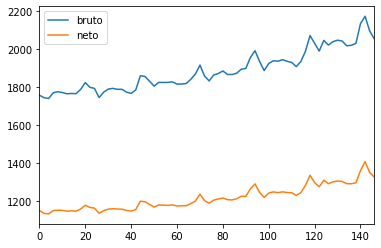

In [31]:
df_javni.plot()
plt.show()

Podamo lahko kateri podatki naj se izrišejo in kaj naj gre na posamezno os:

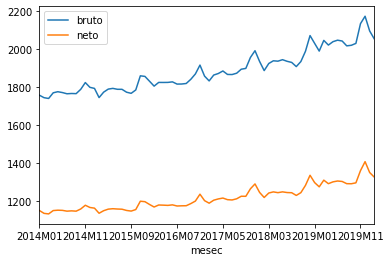

In [32]:
df_javni.plot(x='mesec', y=['bruto','neto'])
plt.show()

Če bi želeli na isti graf risati iz različnih tabel, moramo to posebej povedati preko argumenta `ax`

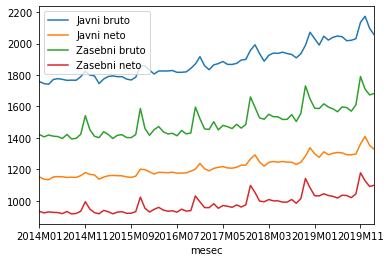

In [33]:
ax = plt.gca() # najprej pridobimo trenutne osi za risanje - te bomo potem podali pri risanju
df_javni.plot(x='mesec', y=['bruto','neto'], ax=ax)
df_zasebni.plot(x='mesec', y=['bruto','neto'], ax=ax)
plt.legend(['Javni bruto', 'Javni neto', 'Zasebni bruto', 'Zasebni neto'])
plt.show()

### Izvoz podatkov
Podatke lahko tudi izvozimo. Izvoz v obliki CSV lahko izvršimo preko metode `to_csv`. Pri tem je ponavadi smiselno argument `index` postaviti na vrednost `False`, saj bomo sicer v datoteko izvozili tudi oznake stolpcev (`index`):

In [34]:
df_javni.to_csv("javni.csv", index=False)

Izvoz (in kasneje uvoz) bi lahko naredili tudi preko datotek orodja Excel. V tem primeru uporabimo metodo `to_excel` (oziroma `read_excel`):

In [36]:
df_javni.to_excel("javni.xlsx", index=False)
df_javni2 = pd.read_excel("javni.xlsx")
df_javni2.head()

,mesec,sektor,bruto,neto
0,2014M01,Javni sektor,1758.50,1151.30
1,2014M02,Javni sektor,1745.63,1136.41
2,2014M03,Javni sektor,1741.44,1133.47
3,2014M04,Javni sektor,1771.34,1151.12
4,2014M05,Javni sektor,1777.09,1153.05
